In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\91909\Desktop\baseball regression project\baseball.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
3,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

<Axes: xlabel='Salary', ylabel='Count'>

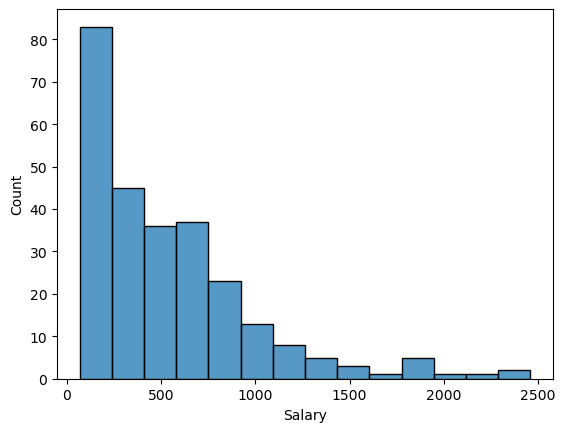

In [4]:
sns.histplot(df['Salary'])

### right skewed target variable , needs to be transformed (log on y)

In [6]:
# df['Salary']=df['Salary'].apply(lambda x:np.log(x))

In [7]:
df.Salary = np.log(df.Salary)


<Axes: xlabel='Salary', ylabel='Count'>

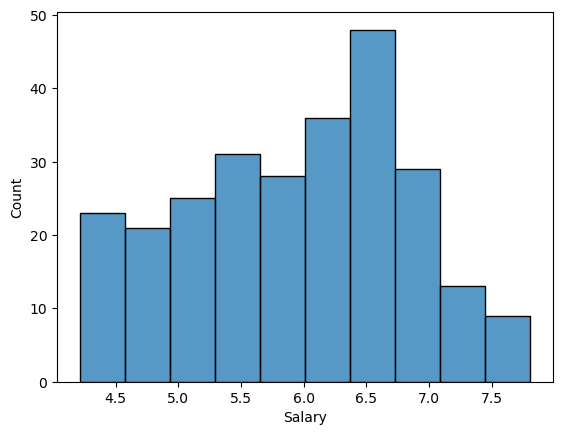

In [8]:
sns.histplot(df['Salary'])

<Axes: >

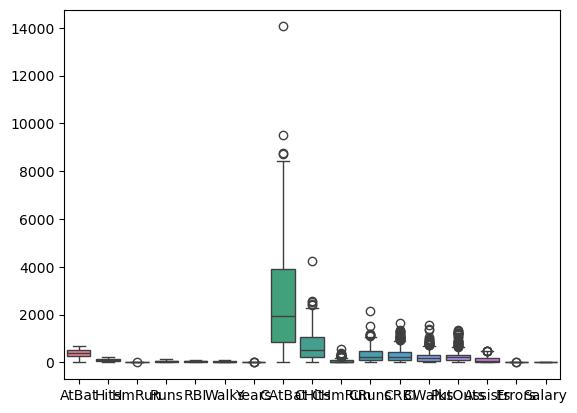

In [9]:
sns.boxplot(df)

<Axes: >

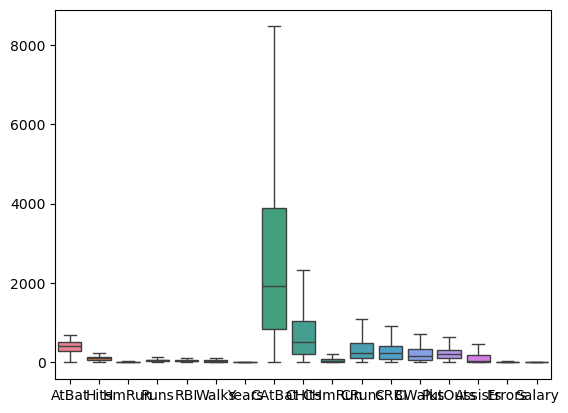

In [10]:
for i in df:                  # i = column name 
    if df[i].dtypes in ("float64","int64"): # df[i] = every column will select float & int column only
        q1 = df[i].quantile(0.25)  # for 1 column compute q1
        q3 = df[i].quantile(0.75)  # for 1 column compute q3
        iqr = q3-q1  # for 1 column compute IQR
        ul = q3 + 1.5*iqr # for 1 column compute UPPER LIMIT
        ll = q1 - 1.5*iqr # for 1 column compute LOWER LIMIT 
        df[i].clip(lower=ll,upper=ul,inplace=True)

sns.boxplot(df)

In [11]:
# #Employee Numeric columns
df_num = df.select_dtypes(include=[np.number])
df_num.head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,315,81,7.0,24,38,39,14,3449.0,835,69.00,321.0,414.0,375.0,632,43,10,6.163315
1,479,130,18.0,66,72,76,3,1624.0,457,63.00,224.0,266.0,263.0,636,82,14,6.173786
2,496,141,20.0,65,78,37,11,5628.0,1575,208.75,828.0,838.0,354.0,200,11,3,6.214608


In [12]:
df_cat = df.select_dtypes(include=['object'])
df_cat.head(3)

,League,Division,NewLeague
0,N,W,N
1,A,W,A
2,N,E,N


In [13]:
from sklearn.preprocessing import LabelEncoder

df_cat = df_cat.apply(LabelEncoder().fit_transform)
df_cat.head(3)


,League,Division,NewLeague
0,1,1,1
1,0,1,0
2,1,0,1


In [14]:
df_final = pd.concat([df_num,df_cat],axis=1)
df_final.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League,Division,NewLeague
0,315,81,7.0,24,38,39,14,3449.0,835,69.00,321.0,414.0,375.0,632,43,10,6.163315,1,1,1
1,479,130,18.0,66,72,76,3,1624.0,457,63.00,224.0,266.0,263.0,636,82,14,6.173786,0,1,0
2,496,141,20.0,65,78,37,11,5628.0,1575,208.75,828.0,838.0,354.0,200,11,3,6.214608,1,0,1
3,321,87,10.0,39,42,30,2,396.0,101,12.00,48.0,46.0,33.0,636,40,4,4.516339,1,0,1
4,594,169,4.0,74,51,35,11,4408.0,1133,19.00,501.0,336.0,194.0,282,421,25,6.620073,0,1,0


In [15]:
x = df_final.drop('Salary', axis= 1)
y = df_final[['Salary']]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, train_size=0.7 ,random_state=125)

In [16]:
train=pd.concat([xtrain,ytrain],axis=1)
train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League,Division,NewLeague,Salary
248,127,32,4.0,14,25,12,19,8396.0,2317,208.75,1048.0,918.75,714.75,167,18,6,1,1,1,6.214608
117,151,41,4.0,26,21,19,2,288.0,68,9.00,45.0,39.00,35.00,28,56,2,0,1,0,4.553877
1,479,130,18.0,66,72,76,3,1624.0,457,63.00,224.0,266.00,263.00,636,82,14,0,1,0,6.173786
3,321,87,10.0,39,42,30,2,396.0,101,12.00,48.0,46.00,33.00,636,40,4,1,0,1,4.516339
37,457,101,14.0,42,63,22,17,6521.0,1767,208.75,1003.0,918.75,619.00,389,39,4,0,1,0,6.774224


In [17]:
test=pd.concat([xtest,ytest],axis=1)
test.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League,Division,NewLeague,Salary
135,591,184,20.0,83,79,38,5,1689.0,462,40.00,219.0,195.00,82.00,303,12,5,1,1,1,6.445720
36,526,146,13.0,71,70,84,6,2648.0,715,77.00,352.0,342.00,289.00,303,9,9,1,1,1,6.703188
152,491,141,11.0,77,47,37,15,4291.0,1240,84.00,615.0,430.00,340.00,239,8,2,0,0,0,6.263398
109,663,200,29.0,108,121,32,4,1447.0,404,57.00,210.0,222.00,68.00,241,8,6,0,0,0,5.521461
49,585,139,31.0,93,94,62,17,7546.0,1982,208.75,1085.5,918.75,714.75,0,0,0,0,0,0,6.856462


In [18]:
# cor=train.corr()
# cor.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 and x!=1 else '')

In [19]:
# cor2=test.corr()
# cor2.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 and x!=1 else '')

In [20]:
train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League,Division,NewLeague,Salary
248,127,32,4.0,14,25,12,19,8396.0,2317,208.75,1048.0,918.75,714.75,167,18,6,1,1,1,6.214608
117,151,41,4.0,26,21,19,2,288.0,68,9.00,45.0,39.00,35.00,28,56,2,0,1,0,4.553877
1,479,130,18.0,66,72,76,3,1624.0,457,63.00,224.0,266.00,263.00,636,82,14,0,1,0,6.173786
3,321,87,10.0,39,42,30,2,396.0,101,12.00,48.0,46.00,33.00,636,40,4,1,0,1,4.516339
37,457,101,14.0,42,63,22,17,6521.0,1767,208.75,1003.0,918.75,619.00,389,39,4,0,1,0,6.774224


In [21]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(xtrain, ytrain)

RandomForestRegressor()

### important features selected (95% importances)

In [23]:
import pandas as pd
import numpy as np

# 1. Get feature importances
importances = model.feature_importances_
feature_names = xtrain.columns

# 2. Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# 3. Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 4. Calculate cumulative importance
feature_importance_df['Cumulative'] = feature_importance_df['Importance'].cumsum()

# 5. Filter features contributing up to 95% importance
selected_features = feature_importance_df[feature_importance_df['Cumulative'] <= 0.95]['Feature'].tolist()

# Optional: Print selected features
print("Selected Features (95% importance):")
print(selected_features)

# 6. Filter xtrain and xtest with these selected features
xtrain_selected = xtrain[selected_features]
xtest_selected = xtest[selected_features]


Selected Features (95% importance):
['CAtBat', 'CHits', 'CRuns', 'CRBI', 'AtBat', 'CWalks', 'Hits', 'RBI', 'Walks', 'CHmRun', 'Runs']


In [24]:
xtrain_selected.head()

,CAtBat,CHits,CRuns,CRBI,AtBat,CWalks,Hits,RBI,Walks,CHmRun,Runs
248,8396.0,2317,1048.0,918.75,127,714.75,32,25,12,208.75,14
117,288.0,68,45.0,39.00,151,35.00,41,21,19,9.00,26
1,1624.0,457,224.0,266.00,479,263.00,130,72,76,63.00,66
3,396.0,101,48.0,46.00,321,33.00,87,42,30,12.00,39
37,6521.0,1767,1003.0,918.75,457,619.00,101,63,22,208.75,42


In [25]:
train_selected=pd.concat([xtrain_selected,ytrain],axis=1)
test_selected=pd.concat([xtest_selected,ytest],axis=1)

In [26]:
train_selected.head()

,CAtBat,CHits,CRuns,CRBI,AtBat,CWalks,Hits,RBI,Walks,CHmRun,Runs,Salary
248,8396.0,2317,1048.0,918.75,127,714.75,32,25,12,208.75,14,6.214608
117,288.0,68,45.0,39.00,151,35.00,41,21,19,9.00,26,4.553877
1,1624.0,457,224.0,266.00,479,263.00,130,72,76,63.00,66,6.173786
3,396.0,101,48.0,46.00,321,33.00,87,42,30,12.00,39,4.516339
37,6521.0,1767,1003.0,918.75,457,619.00,101,63,22,208.75,42,6.774224


In [27]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(
                            random_state=40,
                              n_estimators=100,
                              max_depth=4,
                              # max_features="sqrt",
                              min_samples_split=15,
                              min_samples_leaf=12
                             )

model2.fit(xtrain_selected, ytrain)

import numpy as np
train_selected['predicted'] = np.round(model2.predict(xtrain_selected),2)
train_selected['residual'] = np.round(train_selected.Salary - train_selected.predicted,2)


from sklearn.metrics import r2_score
r2 = r2_score(train_selected.Salary,train_selected.predicted)
print('R2 score for model Performance on Train : ', np.round(r2,2)*100)

import numpy as np
test_selected['predicted'] = np.round(model2.predict(xtest_selected),2)
test_selected['residual'] = np.round(test_selected.Salary - test_selected.predicted,2)


from sklearn.metrics import r2_score
r = r2_score(test_selected.Salary,test_selected.predicted)
print('R2 score for model Performance on test : ', np.round(r,2)*100)



R2 score for model Performance on Train :  75.0
R2 score for model Performance on test :  74.0


### grid search cv 

In [29]:
# param_grid = {
#     'n_estimators': [100],  # Try more trees
#     'max_depth': [ 4,3],  # Allow deeper trees
#     # 'max_features': ['sqrt'],  # Try different feature selection
#     'min_samples_split': [15,20],  # Adjust split sensitivity
#     'min_samples_leaf': [10,12]  # Try smaller leaf sizes
# }


# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor

# # Define model
# rf = RandomForestRegressor(random_state=40)

# # GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
#                            scoring='r2', cv=5, verbose=1 )

# # Fit the model
# grid_search.fit(xtrain_selected, ytrain)
# best_param=grid_search.best_params_
# # Best parameters
# print("Best Parameters:", grid_search.best_params_)


# finished 

In [31]:
xtrain_selected.head()

,CAtBat,CHits,CRuns,CRBI,AtBat,CWalks,Hits,RBI,Walks,CHmRun,Runs
248,8396.0,2317,1048.0,918.75,127,714.75,32,25,12,208.75,14
117,288.0,68,45.0,39.00,151,35.00,41,21,19,9.00,26
1,1624.0,457,224.0,266.00,479,263.00,130,72,76,63.00,66
3,396.0,101,48.0,46.00,321,33.00,87,42,30,12.00,39
37,6521.0,1767,1003.0,918.75,457,619.00,101,63,22,208.75,42


In [68]:
xtrain_selected.columns

Index(['CAtBat', 'CHits', 'CRuns', 'CRBI', 'AtBat', 'CWalks', 'Hits', 'RBI',
       'Walks', 'CHmRun', 'Runs'],
      dtype='object')

### we need to do exponentiation on prediction as well

In [33]:
# ytrain['real_prediction']=ytrain['Salary'].apply(lambda x:np.exp(x))

ytrain['real_prediction']=np.exp(ytrain.Salary)

ytrain.head()

,Salary,real_prediction
248,6.214608,500.0
117,4.553877,95.0
1,6.173786,480.0
3,4.516339,91.5
37,6.774224,875.0


In [34]:
import pickle

pickle.dump(model2, open(r"C:\Users\91909\Desktop\baseball regression project\baseball.pkl",'wb'))  

In [35]:
import sklearn
print(sklearn.__version__)
print(np.__version__)

1.5.1
1.26.4
